<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/04_Interpolacion/00_Series_de_Taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de Taylor
### Proyecto PAPIME PE101019
- Autor: Luis M. de la Cruz Salas
- Rev: mar jun  2 17:08:27 CDT 2020

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('ggplot')

In [ ]:
def RMS(ua, u):
    """
    Calcula el error cuadrático medio entre u y ua.
    
    Parameters
    ----------
    ua: np.array
    Arreglo de valores aproximados.
    
    u: np.array
    Arreglo de valores exactos.
    
    Returns
    -------
    float
    El error cuadrático medio entre u y ua.
    """
    return np.sqrt(np.sum((ua - u)**2) / len(ua))

In [ ]:
def plotCurva(x,y,label='$cos(x)$'):
    """
    Grafica x vs y.
    
    Parameters
    ----------
    x: np.array
    Arreglo de valores en el eje x.
    
    y: np.array
    Arreglo de valores en el eje y.
    """
    plt.figure(figsize=(10,5))
    plt.plot(x,y,label=label, lw=4.0)
    plt.ylim(-2,2)
    plt.yticks([-1,0,1], fontsize=16)
    plt.xticks(ticks=np.arange(-2*np.pi, 2*np.pi+0.01,np.pi),
              labels=['2$\pi$', '$\pi$', '0', '$\pi$', '2$\pi$'],
              fontsize=16)
    plt.grid(ls='--',lw=1)
    ax = plt.gca()    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.tick_params(which='major', width=0.75, length=2.5, labelsize=16)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.legend(loc=(1,.6))

# Introducción
Algunas veces es necesario aproximar funciones complicadas usando una combinación de otras funciones más simples. Estas funciones más simples deberían permitir un tratamiento sencillo, por ejemplo encontrar sus derivadas o sus integrales. La pregunta es ¿qué tan bien se pueden aproximar las funciones complejas con esta combinación de funciones?.

Veamos un ejemplo.

Consideramos la función trigonométrica $\cos(x)$, cuya gráfica es la siguiente:

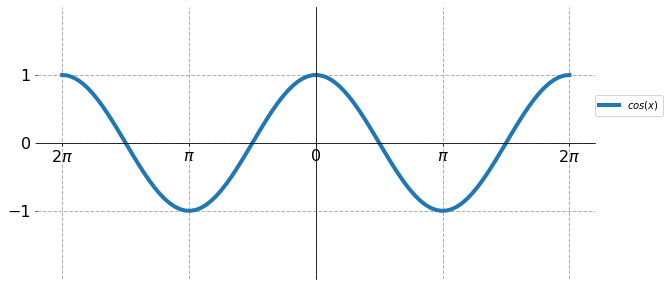

In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,100)
y = np.cos(x)
plotCurva(x,y)

¿Será posible aproximar la función $\cos(x)$ mediante un polinomio del tipo: $P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 + \dots$?

Para fijar ideas, intentemos aproximar el $\cos(x)$ en $x=0$. Sabemos que $\cos(0) = 1$.

## Aproximación 0

Supongamos que deseamos aproximar usando solo el término constante del polinomio, esto es:

$P_0(x) = c_0$

Dado que se debe cumplir $P_0(0) = \cos(0) = 1$ entonces $c_0 = 1$, es decir

$P_0(x) = 1$

¿Cómo se ve esta aproximación?

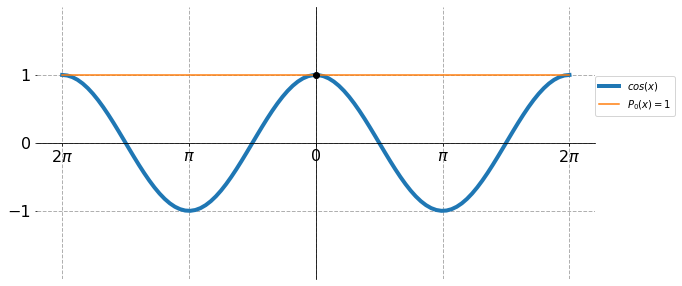

In [ ]:
c0 = 1
P0 = [c0 for i in x]

plotCurva(x,y)
plt.scatter(0, 1, color='k', zorder=10)
plt.plot(x, P0, label='$P_0(x) = 1$')
plt.legend(loc=(1,.6))

Observamos que solo hay unos puntos donde la función y el polinomio son iguales, particularmente en $x=0$.
¿Cómo se podría tener una mejor aproximación.

## Aproximación 1

La respuesta a la pregunta anterior es usando más términos en el polinomio. Usemos ahora el polinomio lineal:

$P_1(x) = c_0 + c_1 x$

Deseamos que $P_1(0) = \cos(0)$, entonces si evaluamos tenemos:

$P_1(0) = c_0 + c_1 * 0 =  c_0$

Pero $P_1(0) = \cos(0) = 1$ entonces $c_0 = 1$, que es el mismo valor que habíamos obtenido en la aproximación anterior.

Sería muy bueno que tanto $P_1(x)$ como $\cos(x)$ también tuvieran la misma derivada en $x=0$, es decir $P_1^\prime(0) = \cos^\prime(0)$. Calculemos la derivada y veamos que se puede obtener de esta condición:

$
\begin{array}{lclcc}
P_1(x) = c_0 + c_1 x& \approx & \cos(x) \\
P_1^\prime(x) = c_1 & \approx & -\sin(x) \\
\hline
P_1(0) = c_0 + c_1 * 0 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_1^\prime(0) = c_1 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
\end{array}
$

Observamos de lo anterior que al evaluar $P_1(x)$ y $P_1^\prime(x)$ en $x=0$ obtenemos $c_0 = 1$ y $c_1 = 0$ respectivamente, por lo que el polinomio que se obtiene es el mismo que antes: $P_1(x) = 1$.

## Aproximación 2

Dado que la aproximación 1 no mejoró, vamos ahora a incluir en el polinomio un término de segundo orden: 

$P_2(x) = c_0 + c_1 x + c_2 x^2$

Siguiendo la misma estrategia que antes podemos calcular la primera y la segunda derivada:

$
\begin{array}{lclcc}
P_2(x) = c_0 + c_1 x + c_2 x^2 & \approx & \cos(x) \\
P_2^\prime(x) = c_1 + 2 c_2 x  & \approx & -\sin(x) \\
P_2^{\prime\prime}(x) = 2 c_2  & \approx & -\cos(x) \\
    \hline
P_2(0) = c_0 + c_1 * 0 + c_2 * 0^2 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_2^\prime(0) = c_1 + 2 c_2 * 0 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_2^{\prime\prime}(0) = 2 c_2  & = & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 
\end{array}
$

Ahora las condiciones fueron $P_2(0) = \cos(0)$, $P_2^\prime(0) = \cos^\prime(0)$ y $P_2^{\prime\prime}(0) = \cos^{\prime\prime}(0)$, de tal manera que el polinomio de aproximación es:

$P_2(x) = 1 - \frac{1}{2} x^2$

¿Es mejor esta aproximación?, veamos:

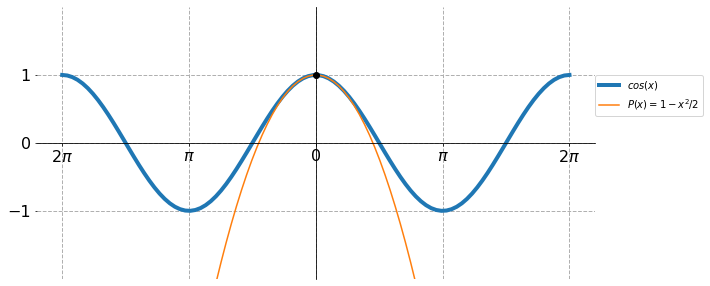

In [ ]:
c1 = 0
c2 = -1/2
P2 = lambda x : c0 + c1 * x + c2 * x**2
plotCurva(x,y)
plt.scatter(0, 1, c='k', zorder=10)
plt.plot(x, P2(x), label='$P(x) = 1 - x^2/2$')
plt.legend(loc=(1,.6))

Observamos que esta aproximación es muy buena en una vecindad de $x=0$. Una manera de evaluar la diferencia entre $P_2(x)$ y $\cos(x)$ alrededor de $x=0$ es calculando el error cuadrático medio que se define como:

$\displaystyle RMS = \sqrt{\frac{\sum_{i=1}^{N} \big(u_a(i) - u(i)\big)^2}{N}} $

donde $u_a$ es la aproximación, $u$ es el valor exacto y $N$ es el número de valores a comparar. Veamos cuál es valor del RMS para esta aproximación:

In [ ]:
x0 = np.linspace(-np.pi*0.5,np.pi*0.5,50)

error2 = RMS(P2(x0), np.cos(x0))
print('RMS(P2(x), cos(x)) : {:10.8}'.format(error2))

RMS(P2(x), cos(x)) : 0.08531014



## Aproximación 3

Veamos si podemos mejorar la aproximación con un polinomio de grado 3:

$P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$

En este caso, para encontrar los coeficientes imponemos las condiciones:

$
\begin{array}{lclcc}
P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 & \approx & \cos(x) \\
P_3^\prime(x) = c_1 + 2 c_2 x + 3 c_3 x^2 & \approx & -\sin(x) \\
P_3^{\prime\prime}(x) = 2 c_2 + 6 c_3 x & \approx & -\cos(x) \\
P_3^{\prime\prime\prime}(x) = 6 c_3  & \approx & \sin(x) \\
    \hline
P_3(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 & \approx & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_3^\prime(0) = c_1 + 2 c_2 * 0 + 3 c_3 * 0^2 & \approx & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_3^{\prime\prime}(0) = 2 c_2 + 6 c_3 * 0 & \approx & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 \\   
P_3^{\prime\prime\prime}(0) = 6 c_3  & \approx & \sin(0) = 0 & \Longrightarrow & c_3 = 0 \\   
\end{array}
$

Sustituyendo en el polinomio vemos que no hay cambios con respecto a la aproximación anterior.

Entonces hagamos una aproximación con más términos.

## Aproximación 4

En esta aproximación usaremos un polinomio de grado 4:

$P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4$

con las siguientes condiciones:

$
\begin{array}{lclcc}
P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 & \approx & \cos(x) \\
P_4^\prime(x) = 1 * c_1 + 2 * c_2 x + 3 * c_3 x^2 + 4 * c_4 x^3 & \approx & -\sin(x) \\
P_4^{\prime\prime}(x) = 1 * 2 * c_2 + 2 * 3 * c_3 x + 3 * 4 * c_4 x^2 & \approx & -\cos(x) \\
P_4^{\prime\prime\prime}(x) = 1 * 2 * 3 * c_3  + 2 * 3 * 4 * c_4 x & \approx & \sin(x) \\
P_4^{(4)}(x) = 1 * 2 * 3 * 4 * c_4 & \approx & \cos(x) \\
    \hline
P_4(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 + c_4 0^4 & \approx & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_4^\prime(0) = 1! * c_1 + 2 * c_2 *0 + 3 * c_3 * 0^2 + 4 * c_4 * 0^3 & \approx 
& -\sin(0) = 0 & \Longrightarrow & c_1 = 0/1! \\
P_4^{\prime\prime}(0) = 2! * c_2 + 2 * 3 * c_3 * 0 + 3 * 4 * c_4 * 0^2 & \approx 
& -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2! \\   
P_4^{\prime\prime\prime}(0) = 3! * c_3  + 2 * 3 * 4 * c_4 * 0 & \approx & \sin(0) = 0 & \Longrightarrow & c_3 = 0/3! \\
P_4^{(4)}(x) = 4! * c_4 & \approx & \cos(0) = 1 & \Longrightarrow & c_4 = 1 / 4! \\
\end{array}
$

Obsérvese que hemos puesto de manera explícita los coeficientes de multiplicación que se obtienen al momento de calcular las derivadas. Esto es para darnos cuenta de que al final obtenemos coeficiente que se calculan usando el factorial de un número. De esta manera, podemos escribir el polinomio como sigue

$P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 = 1 + \frac{0}{1!} x + \frac{-1}{2!} x^2 + \frac{0}{3!} x^3 + \frac{1}{4!} x^4 = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4$

Una cosa interesante que se puede notar es que los coeficientes de las aproximaciones anteriores se mantienen en el mismo valor, sin importar el grado del polinomio que se use.

Veamos que tan buena es esta última aproximación:

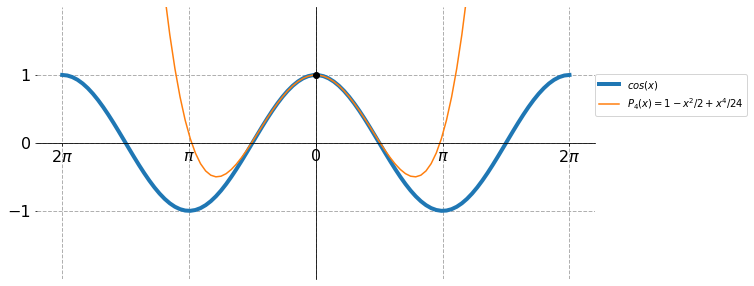

In [ ]:
c3 = 0
c4 = 1/24
P4 = lambda x : c0 + c2 * x**2 + c3 * x**3 + c4 * x**4
plotCurva(x,y)
plt.scatter(0, 1, c='k', zorder=10)
plt.plot(x, P4(x), label='$P_4(x) = 1 - x^2 / 2 + x^4 / 24$')
plt.legend(loc=(1,0.6))

In [ ]:
error4 = RMS(P4(x0), np.cos(x0))
print('RMS(P2(x), cos(x)) : {:10.8}'.format(error2))
print('RMS(P4(x), cos(x)) : {:10.8}'.format(error4))

RMS(P2(x), cos(x)) : 0.08531014
RMS(P4(x), cos(x)) : 0.00624729


Nótese que el RMS disminuyó con respecto a la aproximación usando $P_2(x)$. Nótese también que los polinomios de grado impar no aportan mejoría, dado que las derivadas impares corresponden a la función $\sin(x)$ que al evaluarla en $x=0$ nos da un valor de cero, lo cual elimina el término impar del polinomio. Entonces, para mejorar la aproximación de $P_4(X)$ deberíamos usar un polinomio de grado 6. A continuación se muestra el código que grafica ese polinomio. Se deja como ejercicio al estudiante que verifique que los coeficientes están correctamente calculados. 

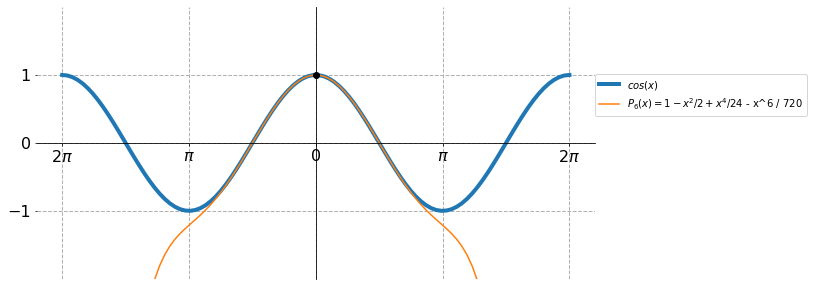

In [ ]:
c5 = 0
c6 = -1 / (1 * 2 * 3 * 4 * 5 * 6)
P6 = lambda x : c0 + c2 * x**2 + c4 * x**4 + c5 * x**5 + c6 * x**6
plotCurva(x,y)
plt.scatter(0, 1, c='k', zorder=10)
plt.plot(x, P6(x), label='$P_6(x) = 1 - x^2 / 2 + x^4 / 24$ - x^6 / 720')
plt.legend(loc=(1,.6))

In [ ]:
error6 = RMS(P6(x0), np.cos(x0))
print('RMS(P2(x), cos(x)) : {:10.8}'.format(error2))
print('RMS(P4(x), cos(x)) : {:10.8}'.format(error4))
print('RMS(P6(x), cos(x)) : {:10.8}'.format(error6))

RMS(P2(x), cos(x)) : 0.08531014
RMS(P4(x), cos(x)) : 0.00624729
RMS(P6(x), cos(x)) : 0.00025321208


Grafiquemos todas las aproximaciones:

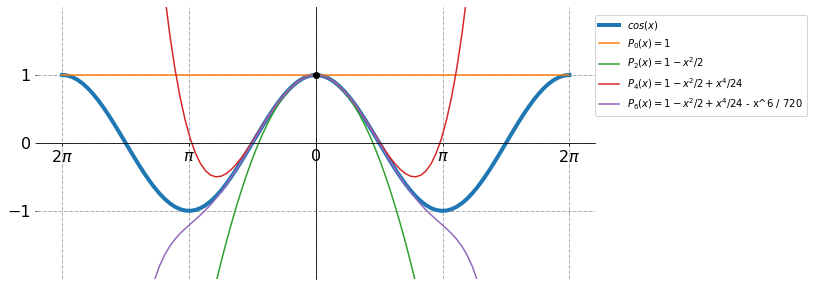

In [ ]:
plotCurva(x,y)
plt.scatter(0, 1, c='k', zorder=10)
plt.plot(x, P0, label='$P_0(x) = 1$')
plt.plot(x, P2(x), label='$P_2(x) = 1 - x^2/2$')
plt.plot(x, P4(x), label='$P_4(x) = 1 - x^2 / 2 + x^4 / 24$')
plt.plot(x, P6(x), label='$P_6(x) = 1 - x^2 / 2 + x^4 / 24$ - x^6 / 720')
plt.legend(loc=(1,0.6))

## Resumen

- Hemos visto como una función puede ser aproximada por una combinación lineal de otras funciones, en este caso por polinomios.
- Los polinomios son más fáciles de tratar, por ejemplo calcular sus derivadas y sus integrales.
- Para calcular los coeficientes de un polinomio, la estrategia es pedir que tanto la función como sus derivadas, sean iguales al polinomio y sus derivadas, evaluados en el punto donde se quiere hacer la aproximación. Por ejemplo, si se desea aproximar la función $f(x)$ en $x=0$ usando $P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$ imponemos las condiciones:

$
\begin{array}{ccc}
P_3(0) = f(0) & \text{ para obtener } & c_0 = f(0)\\
P_3^\prime(0) = f^\prime(0) & \text{ para obtener } & c_1 = f^\prime(0) / 1!\\
P_3^{\prime\prime}(0) = f^{\prime\prime}(0) & \text{ para obtener } & c_2 = f^{\prime\prime}(0) / 2!\\
P_3^{\prime\prime\prime}(0) = f^{\prime\prime\prime}(0) & \text{ para obtener } & c_3 = f^{\prime\prime\prime}(0) / 3!\\
\end{array}
$

- Por lo tanto, otra manera de escribir el polinomio es la siguiente:

$P_3(x) = f(0) + \dfrac{f^\prime(0)}{1!} x + \dfrac{f^{\prime\prime}(0)}{2!} x^2 + \dfrac{f^{\prime\prime\prime}(0)}{3!} x^3$ 

- Se puede comprobar fácilmente que si la aproximación se requiere hacer en un punto diferente de cero, digamos en $x = a$, el polinomio de tercer grado se escribe como:

$P_3(x) = f(a) + \dfrac{f^\prime(a)}{1!}(x-a) + \dfrac{f^{\prime\prime}(a)}{2!} (x-a)^2 + \dfrac{f^{\prime\prime\prime}(a)}{3!} (x-a)^3$ 

Esta forma se conoce como el polinomio de Taylor de tercer grado. En general, un polinomio de Taylor de grado $n$ se escribe como:

$\displaystyle
P_n(x) = f(a) + f^\prime(a)(x-a) + f^{\prime\prime}(a)\frac{(x-a)^2}{2!} + \dots + f^{(n)}(a)\frac{(x-a)^n}{n!}
 = f(a) + \sum_{i=1}^n f^{(i)}(a)\frac{(x-a)^i}{i!}$
 
 - Entre más alto sea el grado del polinomio, la aproximación es mejor.

In [ ]:
#from sympy.abc import x
from sympy import Symbol, cos, sin, exp, series
from sympy.utilities.lambdify import lambdify

In [ ]:
t = Symbol('x')
series(cos(t),t, x0=0,n=11)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 - x**10/3628800 + O(x**11)

In [ ]:
def calcTaylor(func, grado):
    taylor = series(func, n=grado+1).removeO()

    evalfunc = lambdify(t, func, modules=['numpy'])
    evaltaylor = lambdify(t, taylor, modules=['numpy'])

    
    plotCurva(x,evalfunc(x),str(func))
    #plt.plot(t, evalfunc(t), label='cos(x)')
    plt.plot(x, evaltaylor(x), label='$P_{}(x)$'.format(grado))
    plt.legend(loc=(1,.6))
    
    error = RMS(evaltaylor(x0), np.cos(x0))
    plt.title('RMS = {:15.14}'.format(error))
    
    return taylor

-x**3/6 + x

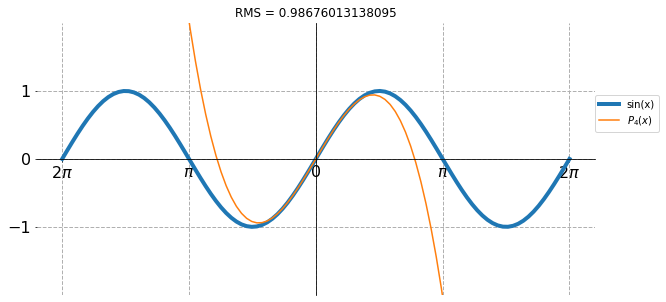

In [ ]:
func = sin(t)
calcTaylor(func, grado=4)

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [ ]:
func = cos(t)
# Construimos un slider
w = interact(calcTaylor,
             func = fixed(func),
             grado = widgets.IntSlider(min=1, max=16, step=1, value=2)) 

display(w)

NameError: ignored